In [1]:
# from pace17_steiner.iparser import parse_pace_file
# import pace17_steiner.solving_package as sp

from fast_algorithm_for_steiner_trees_1981.kou_et_al import kou_et_al 

In [5]:
steiner_graph = parse_pace_file(content)

In [7]:
import networkx as nx
nx.draw(steiner_graph.graph)

NameError: name 'steiner_graph' is not defined

In [7]:
solution = sp.run(steiner_graph, sp.SolvingConfig())

NameError: name 'sp' is not defined

In [ ]:
nx.draw(steiner_graph.graph)

In [3]:
import networkx as nx

In [4]:
def distance_heuristics(nx_graph):
    length = dict(nx.all_pairs_dijkstra_path_length(nx_graph))
    def taxicab_distance(n1, n2) -> int:
        # print(length)
        
        return length[n1][n2]
        # else:
        #     return length[(n2, n1)]
    return taxicab_distance
g = nx.grid_graph((10,10))
for (u, v) in g.edges(): # adding weights to edges
    g[u][v]["weight"] = 1


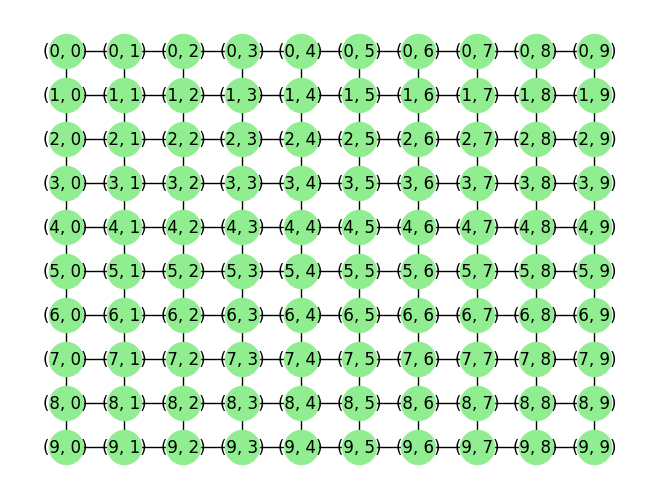

In [197]:
pos = {(x,y):(y,-x) for x,y in g.nodes()}
nx.draw(g, pos=pos, 
        node_color='lightgreen', 
        with_labels=True,
        node_size=600)

In [198]:

terminal_nodes = [(0,0), (2,5), (1,7)]
steiner_tree_approx = kou_et_al(g, taxicab_distance, terminal_nodes, "weight")

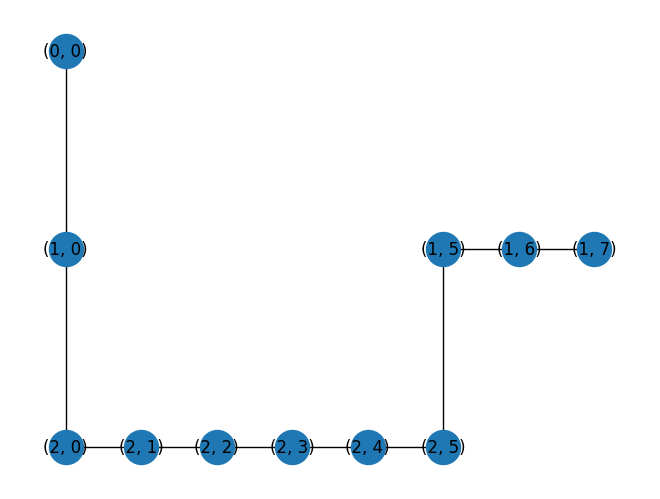

In [199]:
nx.draw(steiner_tree_approx, pos=pos,  with_labels=True, node_size=600
       )

In [200]:
def taxicab_distance(p1: tuple, p2:tuple) -> int:
    return 0

g = nx.grid_graph((10,10))
for (u, v) in g.edges(): # adding weights to edges
    g[u][v]["weight"] = 1

terminal_nodes = [(0,0), (2,5), (1,7)]
steiner_tree_approx = kou_et_al(g, taxicab_distance, terminal_nodes, "weight")

In [201]:
sample_G = nx.Graph()
sample_G.add_node("participates_in", type="table")
sample_G.add_node("activity", type="table")
sample_G.add_node("student", type="table")
sample_G.add_node("faculty_participates", type="table")
sample_G.add_node("faculty", type="table")

In [202]:
sample_G.add_edge("participates_in", "activity", weight=1)
sample_G.add_edge("participates_in", "student", weight=1)

sample_G.add_edge("faculty_participates", "activity", weight=1)
sample_G.add_edge("faculty_participates", "faculty", weight=1)

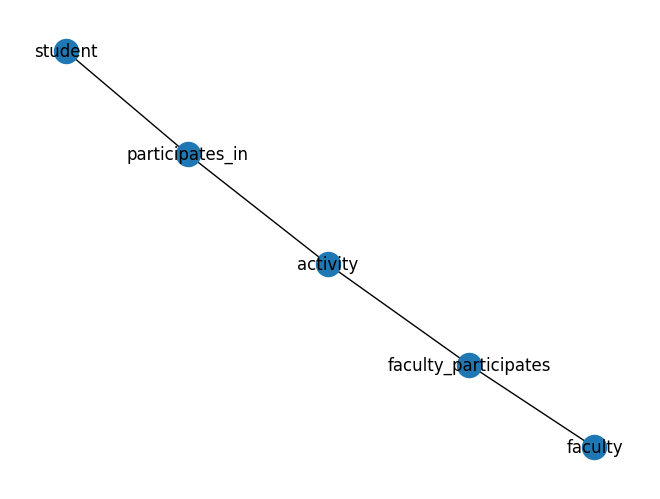

In [203]:
nx.draw(sample_G, with_labels=True)

In [204]:
path = dict(nx.all_pairs_dijkstra_path(sample_G))
print(path['student']['faculty'])

['student', 'participates_in', 'activity', 'faculty_participates', 'faculty']


In [205]:
sample_terminal_nodes = ['activity', 'student']
sample_steiner_tree_approx = kou_et_al(sample_G, distance_heuristics(sample_G), sample_terminal_nodes, "weight")

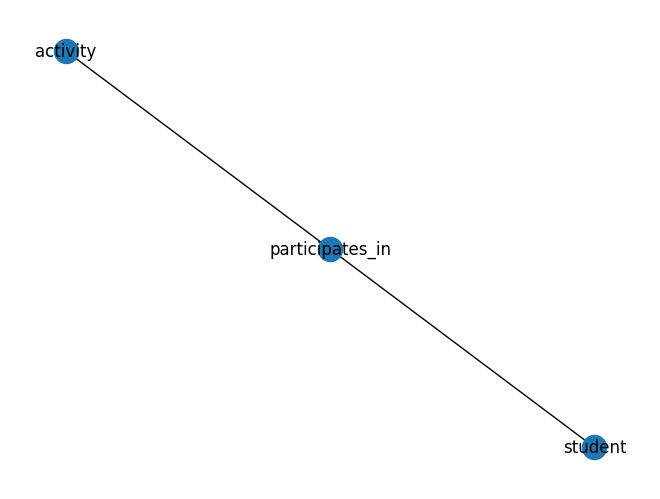

In [206]:
nx.draw(sample_steiner_tree_approx, with_labels=True)

In [207]:
b

NameError: name 'b' is not defined

## Applying Steiner Tree to actual schema

In [5]:
import os 

from process_sql import Schema, get_schema, get_sql


db_dir = os.getcwd()[:9] + os.path.join('tonyk', 'Downloads', 'spider', 'spider', 'database')

db_id = 'flight_1'
db = os.path.join(db_dir, db_id, db_id + ".sqlite")
db_schema = Schema(get_schema(db))

In [6]:
sample_G2 = nx.Graph()

for (t, cols) in list(db_schema.schema.items()):
    print(t)
    print(cols)
    sample_G2.add_node(t, type="entity")
    for c in cols:
        sample_G2.add_node(f"{t}.{c}", type="entity.attribute")
        sample_G2.add_edge(f"{t}.{c}", t, weight=1)


flight
['flno', 'origin', 'destination', 'distance', 'departure_date', 'arrival_date', 'price', 'aid']
aircraft
['aid', 'name', 'distance']
employee
['eid', 'name', 'salary']
certificate
['eid', 'aid']


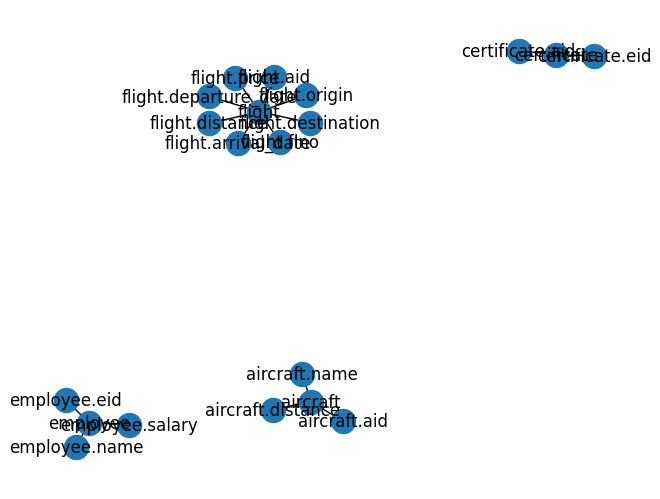

In [7]:
nx.draw(sample_G2, with_labels=True)

In [8]:
import sqlite3

def get_schema_and_fk_relationship(db):
    """
    Get 
    - database's schema, whichis adict with table name as key and list of column names as value
    - database's foreign key relationships, which is a dict with FROM entity.attribute as key and list of TO entity.attributes as value
    :param db: database path
    :return: schema dict
    """

    schema = {}
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    # fetch table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [str(table[0]) for table in cursor.fetchall()]

    # fetch table info
    for table in tables:
        cursor.execute("PRAGMA table_info({})".format(table))
        schema[table] = [str(col[1]) for col in cursor.fetchall()]
        
    # fetch table info
    fk_relationships = {}
    for table in tables:
        cursor.execute("SELECT * FROM pragma_foreign_key_list('{}')".format(table))        
        for r in cursor.fetchall():
            # print(r)
            entity_attribute_pair_1 = table + '.' + r[3]
            entity_attribute_pair_2 = r[2] + '.' + r[4]
            fk_relationships.setdefault(entity_attribute_pair_1,[]).append(entity_attribute_pair_2)
            fk_relationships.setdefault(entity_attribute_pair_2,[]).append(entity_attribute_pair_1)
        
        # print(fk_relationships)        
    return schema, fk_relationships



In [9]:
sc, fkr = get_schema_and_fk_relationship(db)

In [10]:
sample_G2 = nx.Graph()

for (t, cols) in list(sc.items()):
    # print(t)
    # print(cols)
    sample_G2.add_node(t, type="entity")
    for c in cols:
        sample_G2.add_node(f"{t}.{c}", type="entity.attribute")
        sample_G2.add_edge(f"{t}.{c}", t, weight=1, type="entiy.attribute")

        entity_attribute = f"{t}.{c}"
        if entity_attribute in fkr:
            for r in fkr[entity_attribute]:
                sample_G2.add_edge(entity_attribute, r, weight=1, type="fkr")
                # print(entity_attribute, r)


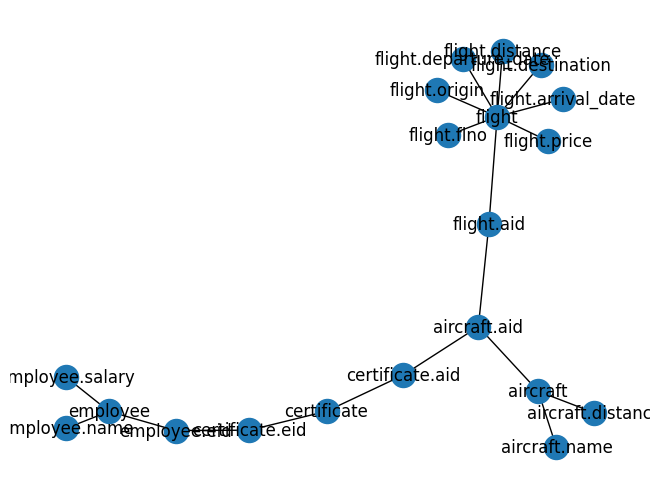

In [11]:
nx.draw(sample_G2, with_labels=True)

In [14]:
sample_terminal_nodes = ['flight', 'employee']
sample_steiner_tree_approx = kou_et_al(sample_G2, distance_heuristics(sample_G2), sample_terminal_nodes, "weight")

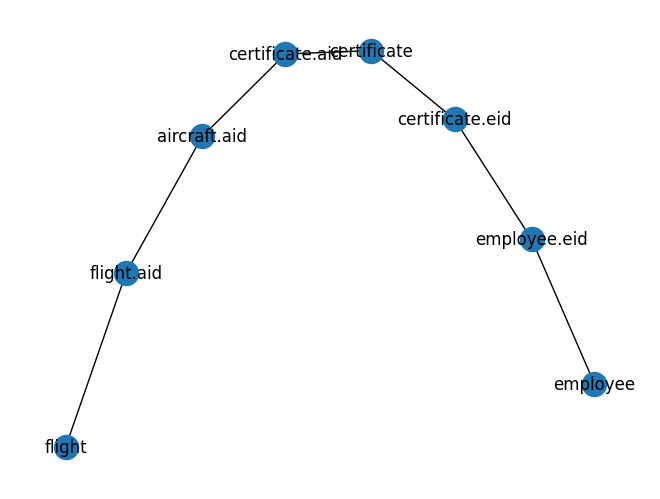

In [15]:
nx.draw(sample_steiner_tree_approx, with_labels=True)

In [16]:
nx.get_edge_attributes(sample_G2, "type")

{('flight', 'flight.flno'): 'entiy.attribute',
 ('flight', 'flight.origin'): 'entiy.attribute',
 ('flight', 'flight.destination'): 'entiy.attribute',
 ('flight', 'flight.distance'): 'entiy.attribute',
 ('flight', 'flight.departure_date'): 'entiy.attribute',
 ('flight', 'flight.arrival_date'): 'entiy.attribute',
 ('flight', 'flight.price'): 'entiy.attribute',
 ('flight', 'flight.aid'): 'entiy.attribute',
 ('flight.aid', 'aircraft.aid'): 'fkr',
 ('aircraft.aid', 'aircraft'): 'entiy.attribute',
 ('aircraft.aid', 'certificate.aid'): 'fkr',
 ('aircraft', 'aircraft.name'): 'entiy.attribute',
 ('aircraft', 'aircraft.distance'): 'entiy.attribute',
 ('certificate.aid', 'certificate'): 'entiy.attribute',
 ('employee', 'employee.eid'): 'entiy.attribute',
 ('employee', 'employee.name'): 'entiy.attribute',
 ('employee', 'employee.salary'): 'entiy.attribute',
 ('employee.eid', 'certificate.eid'): 'fkr',
 ('certificate.eid', 'certificate'): 'entiy.attribute'}

In [226]:
node_attributes = nx.get_node_attributes(sample_G2, "type")
edge_attributes = nx.get_edge_attributes(sample_G2, "type")
join_pairs = []

for e in sample_steiner_tree_approx.edges:
    print(e)
    if e in edge_attributes and edge_attributes[e] == "fkr":
        join_pairs.append((e[0], e[1]))
    elif (e[1], e[0]) in edge_attributes and edge_attributes[(e[1], e[0])] == "fkr":
        join_pairs.append((e[1], e[0]))

('head', 'head.age')
('head', 'head.head_ID')
('head.head_ID', 'management.head_ID')
('management.head_ID', 'management')
('management', 'management.temporary_acting')


In [227]:
join_pairs

[('head.head_ID', 'management.head_ID')]

In [228]:
nx.get_node_attributes(sample_G2, "type")['head']

'entity'

In [229]:
FROM_clause = f"FROM "

mentioned_tables = set()
def split_entity_attribute(entity_attribute):
    entity, attribute = entity_attribute.split(".")
    return entity, attribute
    
for idx, jp in enumerate(join_pairs):
    entity_attribute_1, entity_attribute_2 = jp
    t_1, a_1 = split_entity_attribute(entity_attribute_1)
    t_2, a_2 = split_entity_attribute(entity_attribute_2)
    print(jp)
    if idx == 0:
        FROM_clause += f"{t_1} JOIN {t_2} ON {entity_attribute_1} = {entity_attribute_2}"
        mentioned_tables.add(t_1)
        mentioned_tables.add(t_2)
    else:
        if t_1 in mentioned_tables and t_2 not in mentioned_tables:
            FROM_clause += f" JOIN {t_2} ON {entity_attribute_1} = {entity_attribute_2}"
            mentioned_tables.add(t_2)
        elif t_2 in mentioned_tables and t_1 not in mentioned_tables:
            FROM_clause += f" JOIN {t_1} ON {entity_attribute_1} = {entity_attribute_2}"
            mentioned_tables.add(t_1)
        elif t_1 in mentioned_tables and t_2 in mentioned_tables:
            pass
        else:
            raise NotImplementedError

('head.head_ID', 'management.head_ID')


In [230]:
FROM_clause

'FROM head JOIN management ON head.head_ID = management.head_ID'

In [2]:
from join_path_generator import join_path_inference

In [3]:
import os 

from process_sql import Schema, get_schema, get_sql


db_dir = os.getcwd()[:9] + os.path.join('tonyk', 'Downloads', 'spider', 'spider', 'database')

db_id = 'department_management'
db = os.path.join(db_dir, db_id, db_id + ".sqlite")
db_schema = Schema(get_schema(db))

sample_evidence_set = ['head', 'head.age', 'management.temporary_acting'] 
join_path_inference(db, sample_evidence_set)

'FROM head JOIN management ON head.head_ID = management.head_ID'